In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd
import dask.dataframe as dd
import warnings
import glob
import fitsio
import matplotlib.transforms as mt
plt.rcParams.update({'font.size': 16})

In [2]:
df_sdo = dd.read_parquet("/mnt/data2/SDO/AIA/dask_parquet", columns=['NSPIKES','WAVELNTH','GAEZ_OBS','GAEX_OBS','GAEY_OBS','EXPTIME','QUALITY','DATAMEAN'])

In [3]:
year_start = 2018; year_end = 2019
month_start = 1; month_end = 12
day_start = 1; day_end = 30
start_d = "{}-{}-{}".format(year_start,str(month_start).zfill(2),str(day_start).zfill(2)); 
end_d = "{}-{}-{}".format(year_end,str(month_end).zfill(2),str(day_end).zfill(2)) 
cadence = '{}min'.format(1) #change to 15 minutes
start_d, end_d

df_sdo = df_sdo.loc[start_d:end_d]

In [4]:
df_sdo.head()

,NSPIKES,WAVELNTH,GAEZ_OBS,GAEX_OBS,GAEY_OBS,EXPTIME,QUALITY,DATAMEAN
T_OBS,,,,,,,,
2018-01-01 00:00:00.570000+00:00,11907,94,-11192110.34,39703881.30,-8758104.20,2.900838,0x00000000,1.0772
2018-01-01 00:00:02.070000+00:00,20566,335,-11195343.63,39703695.11,-8754820.17,2.900777,0x00000000,1.0101
2018-01-01 00:00:05.840000+00:00,4830,193,-11203467.03,39703225.20,-8746568.22,2.000079,0x00000000,127.0011
2018-01-01 00:00:06.580000+00:00,21027,304,-11205056.12,39703132.91,-8744953.80,2.902053,0x00000000,4.7909
2018-01-01 00:00:08.070000+00:00,13184,131,-11208272.04,39702945.80,-8741686.46,2.901282,0x00000000,5.0944


In [5]:
# SDO
df_sdo = df_sdo.loc[(df_sdo['QUALITY'] == '0x00000000') & (df_sdo['NSPIKES']>0)].compute()

In [6]:
df_sdo.groupby(['WAVELNTH'])['NSPIKES'].median()

WAVELNTH
94     16311.0
131    17041.0
171     4987.0
193     6399.0
211    11753.0
304    25607.0
335    25780.0
Name: NSPIKES, dtype: float64

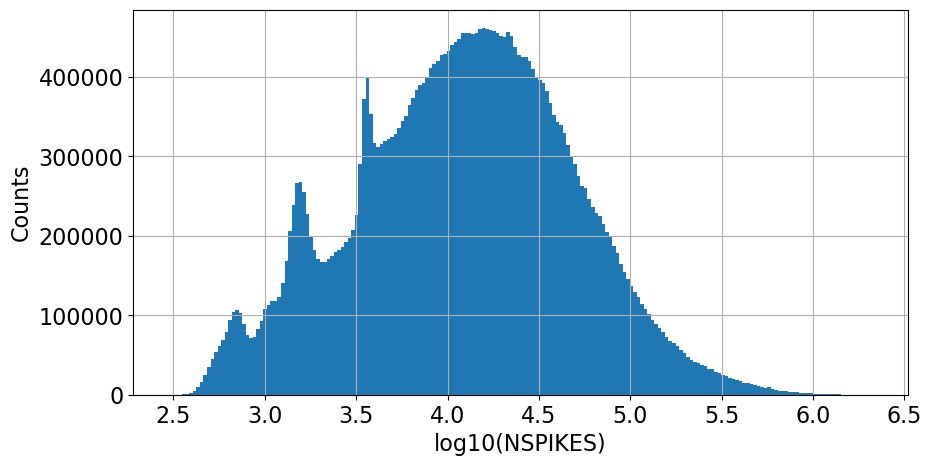

In [7]:
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.hist(np.log10(df_sdo['NSPIKES']),bins=200);

# ax.axvline(1.5, color='gray')
ax.set_xlabel('log10(NSPIKES)')
ax.set_ylabel('Counts')
plt.grid()

In [2]:
def load_spikes_wavel(sp_dir, wavel):
    sp_fits = sorted(glob.glob(os.path.join(spikes_dir, '2010', '07', '25', f'2010-07-25T18:*{wavel:04d}.spikes.fits')))
    sp_data = [fitsio.read(f) for f in sp_fits]
    sp_data = np.concatenate(sp_data, axis=1)
    return sp_data

In [3]:
wavel = [94,131,171,193,211,304,335]
spikes_dir = os.path.join(os.environ['DATA'], 'SDO', 'AIA', 'spikes')

sp_dict = {}
for w in wavel:
    sp_dict[str(w)] = load_spikes_wavel(spikes_dir, w)

(0.0, 5000.0)

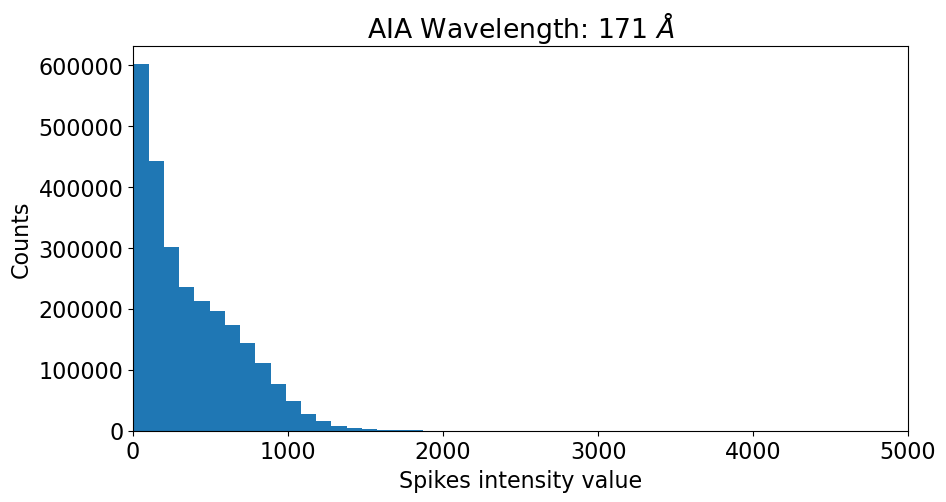

In [7]:
w = '171'
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.hist(sp_dict[w][1,:], bins=200);
ax.set_title('AIA Wavelength: '+ w + r' $\AA$')
ax.set_xlabel('Spikes intensity value')
ax.set_ylabel('Counts')
ax.set_xlim([0, 5000])

In [32]:
sp_data[1,:].max()

20396